# Analyzing images of SDT horiz lines

Leanne Friedrich 4/27/23

## Initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
sys.path.append(os.path.dirname(module_path))
from py.tools.config import cfg
import py.tools.logs as logs
import py.vid.v_tools as vt
import py.metrics.m_SDT as me
from py.im.imshow import imshow
import py.file.file_handling as fh
import py.vid.noz_detect as nt
import pandas as pd
from py.full_sequence import SDTWorkflow, fullSequencer
LOGGERDEFINED = logs.openLog('still_measure_horiz.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# export crops

In [3]:
from py.val.v_print import printVals
vt1 = printVals(os.path.join(cfg.path.server, r'SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_v2_230509\disturbHoriz3_1_0.875'))

In [4]:
vt1.metarow()

({'printFolderR': 'SDT\\SO_S20-0.5\\I_SO7-S20-0.5_S_3.00\\I_SO7-S20-0.5_S_3.00_v2_230509\\disturbHoriz3_1_0.875',
  'bn': 'I_SO7-S20-0.5_S_3.00',
  'date': 230509,
  'sigma': 1.7649,
  'fluFile': True,
  'calibFile': True,
  'spacing': 0.875,
  'vRatio': 1.0,
  'dEst': 0.603,
  'viscRatio': 0.38390701156841567,
  'tau0aRatio': 0.03353559842478705,
  'tau0dRatio': 0.8376511557406146,
  'GaRatio': 0.8040215028854476,
  'GdRatio': 0.8404603984811175,
  'GtaRatio': 10.662526239092344,
  'tGdRatio': 0.001590308992297505,
  'rGrava': -58819387.75510198,
  'rGravd': -1230685.5867346926,
  'int_Re': 0.0025306682529130996,
  'ReRatio': 1.6644929151993595,
  'hDragP': 68.8537974454847,
  'vDragP': 312.09818914140413,
  'int_CaInv': 0.07481743470469752,
  'pressureCh0': 118353.62978249586,
  'ink_shortname': 'SO7-S20-0.5',
  'ink_days': 1,
  'ink_rheModifier': 'Aerosil R812S',
  'ink_surfactant': 'Span 20',
  'ink_surfactantWt': 0.5,
  'ink_diluent': '',
  'ink_diluentWt': '',
  'ink_dye': 'red',

In [ ]:
# export cropped images and table of their crop locations
folder = [os.path.join(cfg.path.server, 'SDT', s) for s in ['SO_S20-0.5', 'SO_S85-0.05']]
cexp = me.cropExporter(folder, me.fileHorizSDT, mustMatch=['Horiz'], overwrite=False)
cexp.run()

In [19]:
# export cropped images and table of their crop locations
folder =os.path.join(cfg.path.server, r'SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_v2_230509\disturbHoriz3_1_0.875')
cexp = me.cropExporter(folder, me.fileHorizSDT, mustMatch=['Horiz'], overwrite=False, printTraceback=True)
cexp.run()

//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-0.5_S_3.00_v2_230509\disturbHoriz3_1_0.875


[]

In [18]:
cexp.testFileError(0)

{'file': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\SO_S20-0.5\\I_SO7-S20-0.5_S_3.00\\I_SO7-S20-0.5_S_3.00_v2_230509\\disturbHoriz3_1_0.875\\disturbHoriz3_1_0.875_vstill_HOh1_l0d1o1_I_SO7-S20-0.5_S_3.00_230509_114517_0.png', 'error': ''}


# generate Usegment

In [ ]:
# export just the segmented images
folder = [os.path.join(cfg.path.server, 'SDT', s) for s in ['SO_S20-0.5', 'SO_S85-0.05']]
hexp = me.segmentExporter(folder, me.fileHorizSDT, mustMatch=['Horiz'], overwrite=False)
herrorList = hexp.run()

# move crops to ML folder

In [4]:
# copy all cropped files to a separate folder for easy file transfer to wipp
cropfolder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCropsVert')
topfolders = [os.path.join(cfg.path.server, 'SDT', 'SO_S85-0.05', f'I_SO8-S85-0.05_S_{s}') for s in ['3.00', '3.50', '4.00']]
for topfolder in topfolders:
    me.copyToMLInputFolder(cropfolder, topfolder, mustMatch=['Horiz'])

In [ ]:
# find folders which are missing ML results and copy the files to the transfer folder
cropfolder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCrops')
topfolder = os.path.join(cfg.path.server, 'SDT')
missingFolders = me.findMissingML(topfolder, cropfolder, mustMatch=['Horiz'])

In [5]:
# split newcrops into sub folders
folder = os.path.join(cfg.path.server, 'singleDoubleTripleML', 'newCrops')
me.splitIntoSubFolders(folder)

# move ML results back to folders

In [6]:
# move ML segmented images from the output folder to the appropriate subfolders
folders = [os.path.join(cfg.path.server
                       , r'singleDoubleTripleML\results'
                       , f'lf-unet-horiz-SO-{s}-v2-2-segment-outputDir'
                       , 'png') for s in [4]]
rm = me.resultMover(folders, os.path.join(cfg.path.server, 'SDT'), tag='MLsegment2')

INFO: Copying 24047 files in ['//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\singleDoubleTripleML\\results\\lf-unet-horiz-SO-4-v2-2-segment-outputDir\\png']
INFO: Copied 1, already 0, total 24047
INFO: Copied 96, already 5, total 24047
INFO: Copied 195, already 6, total 24047
INFO: Copied 295, already 6, total 24047
INFO: Copied 390, already 11, total 24047
INFO: Copied 487, already 14, total 24047
INFO: Copied 587, already 14, total 24047
INFO: Copied 685, already 16, total 24047
INFO: Copied 783, already 18, total 24047
INFO: Copied 878, already 23, total 24047
INFO: Copied 976, already 25, total 24047
INFO: Copied 1074, already 27, total 24047
INFO: Copied 1173, already 28, total 24047
INFO: Copied 1270, already 31, total 24047
INFO: Copied 1367, already 34, total 24047
INFO: Copied 1465, already 36, total 24047
INFO: Copied 1562, already 39, total 24047
INFO: Copied 1660, already 41, total 24047
INFO: Copied 1758, already 43, total 24047
INFO: Copied 1853, already 4

In [6]:
rm.moveMLResult(rm.error[0])

FileNotFoundError: Could not find disturbHoriz3_2_1.250_vstill_HOh2_l3w1o6_I_SO11_S_3.50_230214_144652_8.png in //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT

# make measurements and summaries and summary table

In [22]:
fstr = r'SDT'
folder = os.path.join(cfg.path.server, fstr)
sv = me.summarizerHorizSDT(folder, overwriteMeasure=False, overwriteSummary=False, folderFile=cfg.path.folderList)

In [23]:
sv.run()
sv.export()

//resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.625
//resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.750
//resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.875
//resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_1.000
//resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_1.250
//resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_2_0.500
//resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_2_0.625
//resdata-smb/642-MSED/642_06/lmf/Shopbot/videos\SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_2_0.750
//resdata-smb/642-MSED/6

In [12]:
fh.openExplorer(sv.folderErrorList[5]['folder'])

In [6]:
sv.testFolderError(0, openFolder=True)

{'folder': '//cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\\SDT\\PDMSS_S85-0.05\\I_PDMSS10-S85-0.05_S_4.00\\I_PDMSS10-S85-0.05_S_4.00_230816\\disturbHoriz3_3_1.000', 'error': AttributeError()}


AttributeError: 

In [ ]:
[sv.testFolderError(i) for i in range(2, len(sv.folderErrorList))]

# evaluate errors

## initialize the test object

In [226]:
ft = me.failureTest(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'HorizSDTFailures.csv'), me.fileHorizSDT)

15935 failed files, 460 failed folders, 651 unchecked folders


## iterate through folders to check measurements and approve if correct or redoing

In [332]:
fostr = ft.firstUnapprovedFolder()
ft.testFolder(fostr, diag=0, overrideSegment=False, useML=False)

In [337]:
ft.approveFolder(fostr, whiteOut=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS10-S85-0.05_S_3.00\I_PDMSS10-S85-0.05_S_3.00_230816\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_failures_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.csv
15934 failed files, 459 failed folders, 631 unchecked folders


save progress

In [338]:
ft.export()

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\HorizSDTFailures.csv


## redo measurements

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_nozDims_I_SO10_S_3.00_230725_150803_0.csv


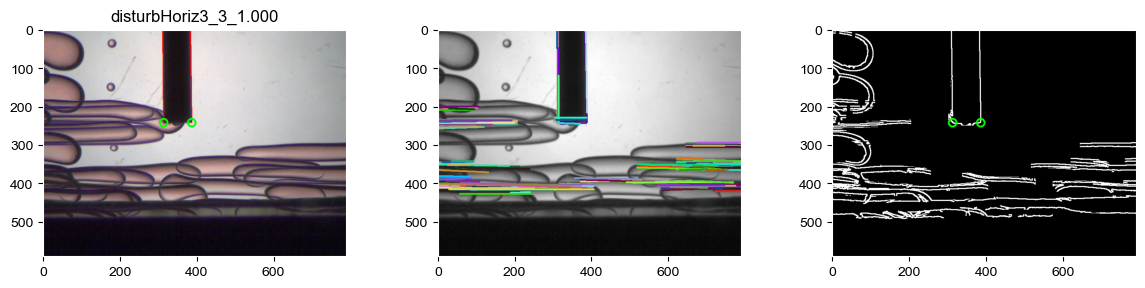

In [78]:
ft.sw.detectNozzle(overwrite=True, diag=2, bgmode=0, modes=[4], frameGetMode=0)

In [826]:
ft.sw.adjustNozzle()

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.50\I_SO10_S_3.50_230208\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_background_I_SO10_S_3.50_230208_161846_6.png


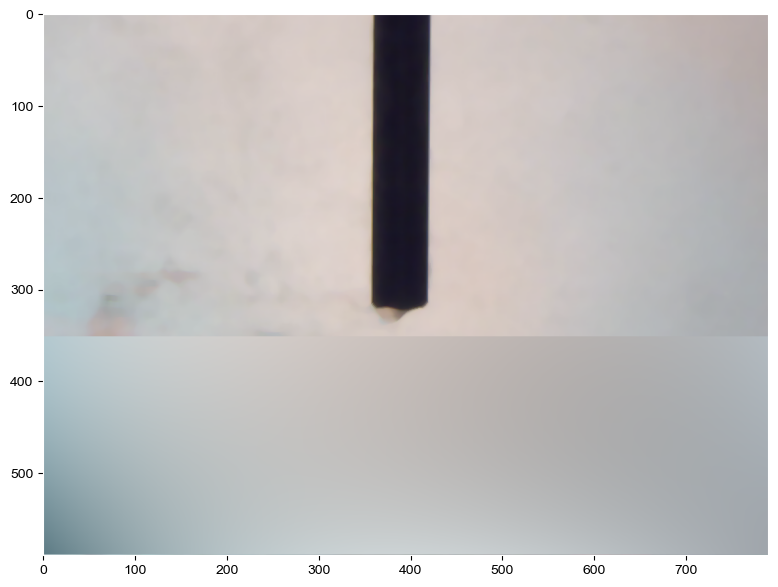

In [194]:
ft.sw.exportBackground(overwrite=True, diag=1, ymin=10, curveFit=True, numpics=4, mode=2)

In [79]:
newcl = True
ft.sw.testAllFailures(diag=0,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

disturbHoriz3_3_1.000_vstill_HOh3_l0w1p3_I_SO10_S_3.00_230725_150803_0.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_cropLocs_I_SO10_S_3.00_230725_150803_0.csv
INFO: Exported disturbHoriz3_3_1.000_Usegment_HOh3_l0w1p3_I_SO10_S_3.00_230725_150803_0.png
disturbHoriz3_3_1.000_vstill_HOh3_l0w1p4_I_SO10_S_3.00_230725_150803_0.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_cropLocs_I_SO10_S_3.00_230725_150803_0.csv
INFO: Exported disturbHoriz3_3_1.000_Usegment_HOh3_l0w1p4_I_SO10_S_3.00_230725_150803_0.png
disturbHoriz3_3_1.000_vstill_HOh3_l0w1p5_I_SO10_S_3.00_230725_150803_0.png
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\SO\I_SO10_S_3.00\I_SO10_S_3.00_230725\disturbHoriz3_3_1.000\disturbHoriz3_3_1.000_cropLocs_I_SO10_S_3

INFO: Exported disturbHoriz3_3_0.500_Usegment_HOh3_l0w1o1_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.png
INFO: Exported disturbHoriz3_3_0.500_Usegment_HOh3_l0w1o2_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.png
INFO: Exported disturbHoriz3_3_0.500_Usegment_HOh3_l0w1o3_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.png
INFO: Exported disturbHoriz3_3_0.500_Usegment_HOh3_l0w1o4_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.png
INFO: Exported disturbHoriz3_3_0.500_Usegment_HOh3_l0w1o5_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.png
INFO: Exported disturbHoriz3_3_0.500_Usegment_HOh3_l0w1o6_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.png
INFO: Exported disturbHoriz3_3_0.500_Usegment_HOh3_l0w1o7_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.png
INFO: Exported disturbHoriz3_3_0.500_Usegment_HOh3_l0w1o8_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.png


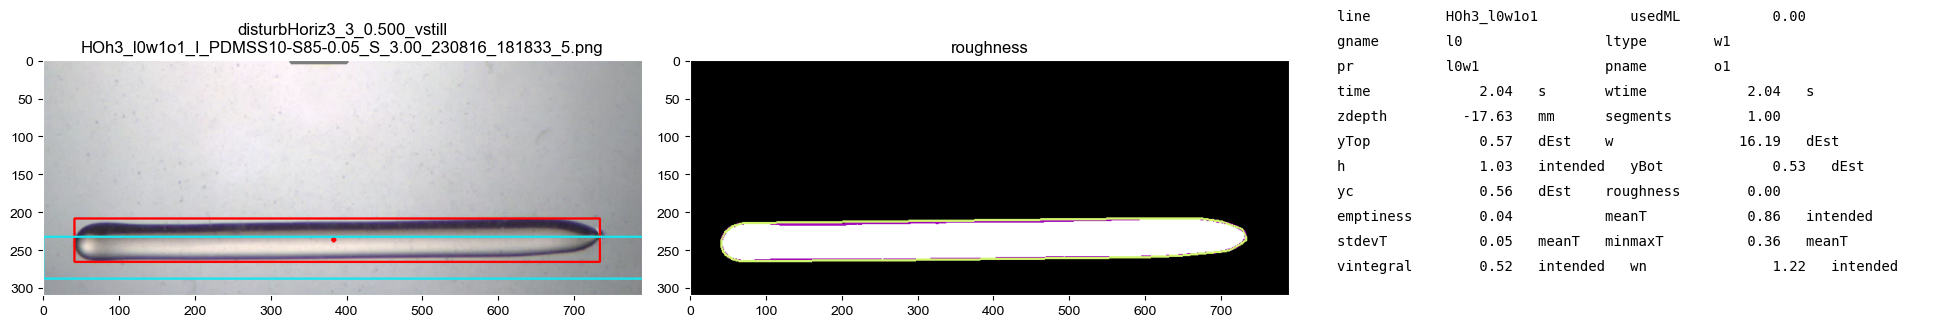

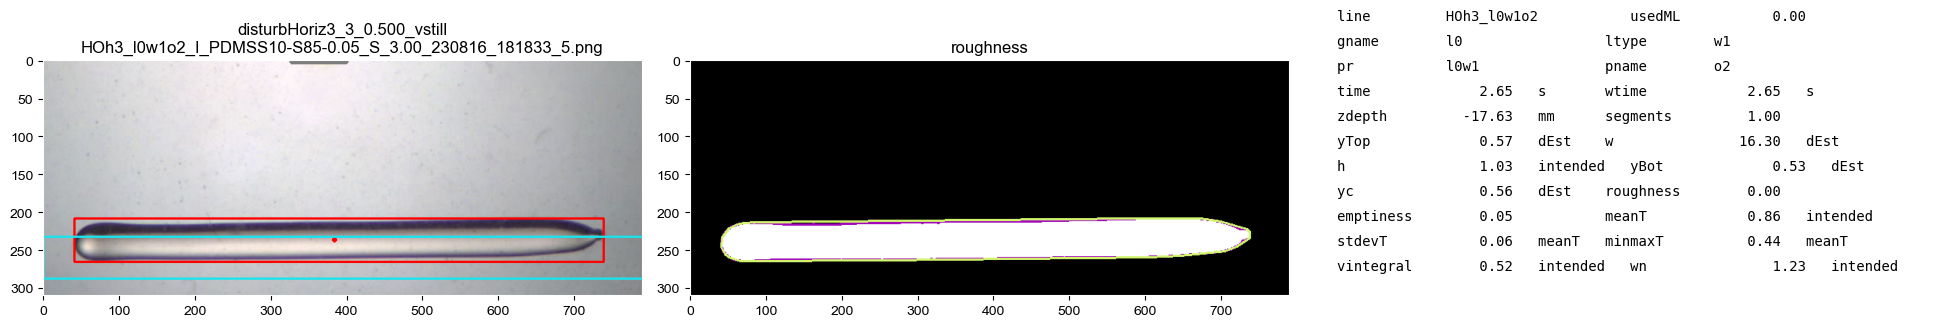

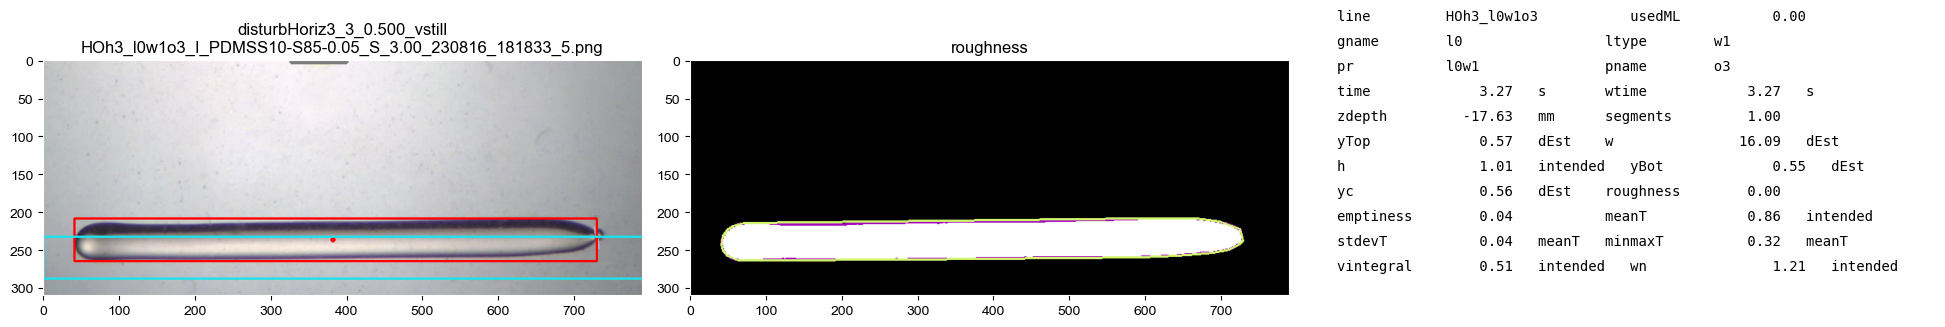

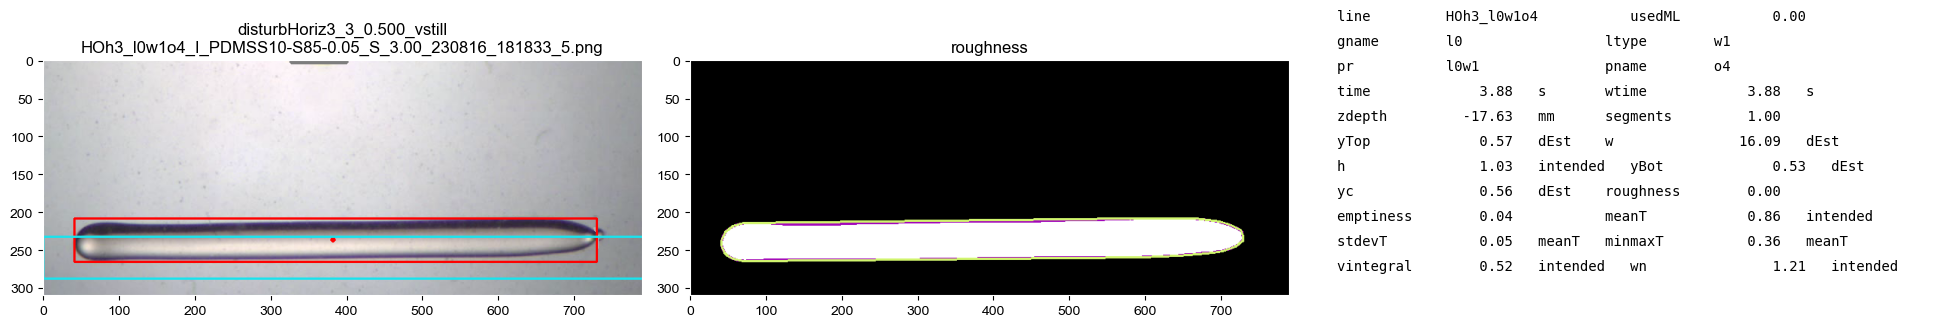

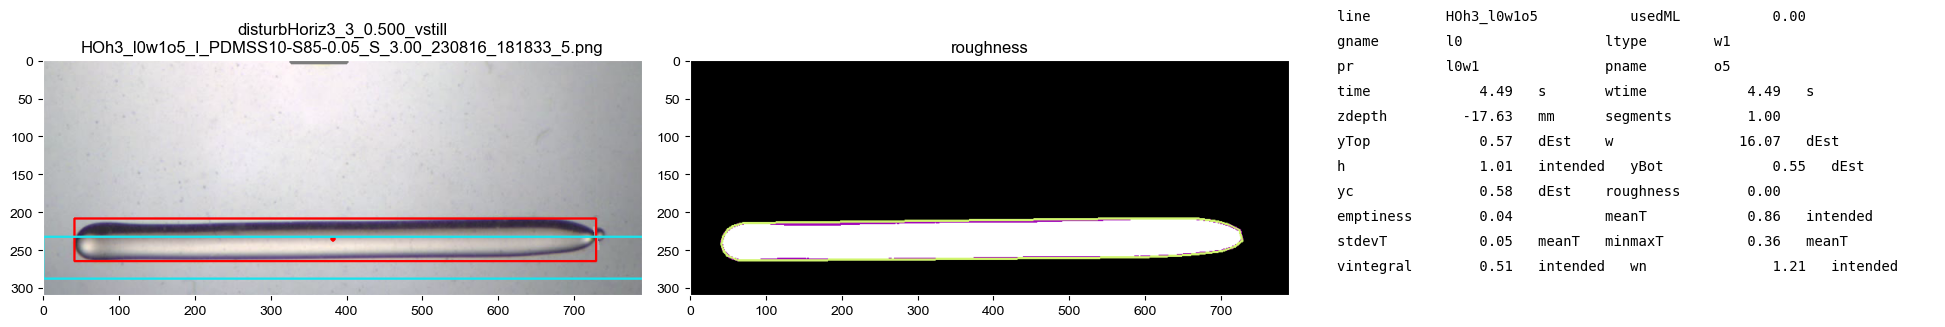

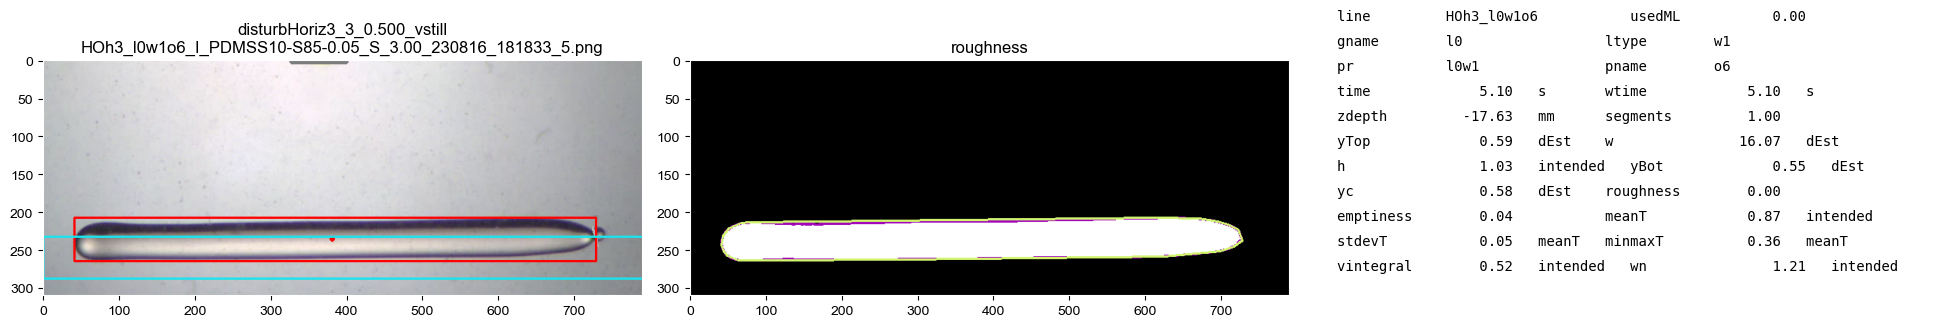

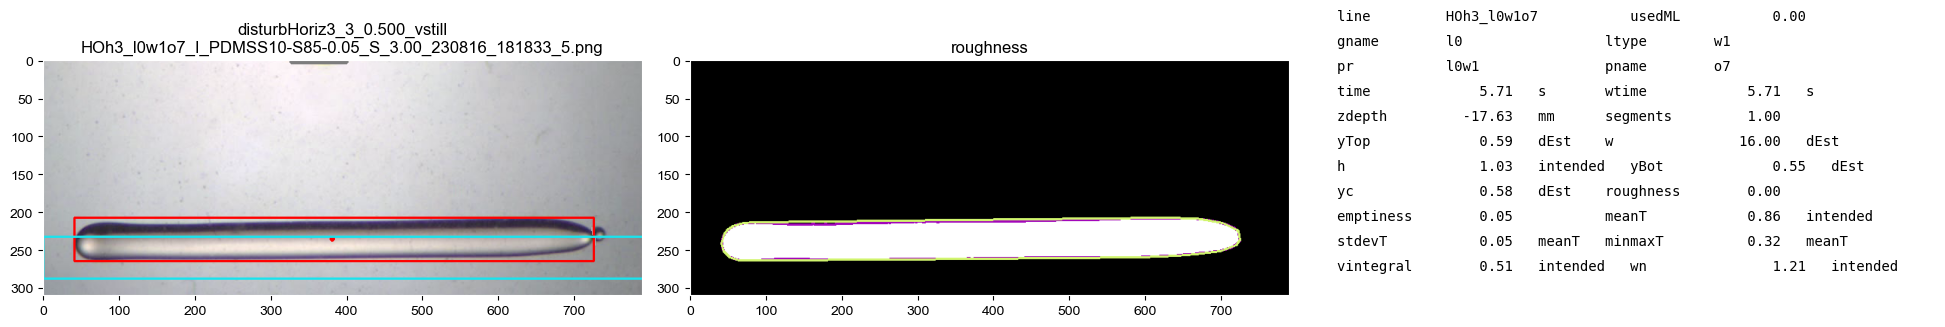

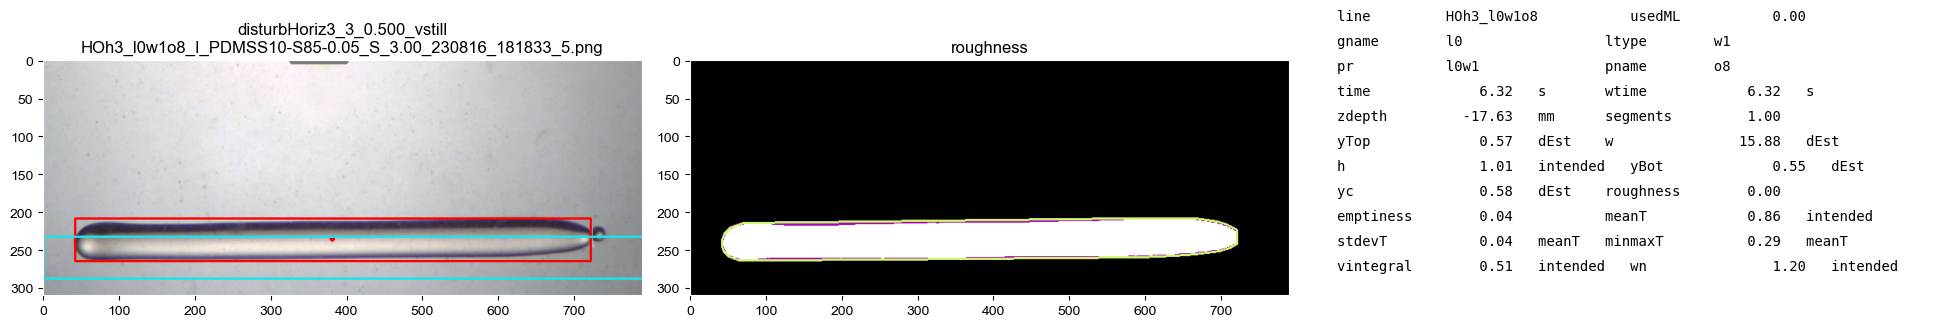

In [335]:
newcl = True
tag = 'l0w1o'
ft.sw.testImage(tag, diag=1,  overrideSegment=True, useML=False, overwriteCropLocs=newcl, exportCropLocs=newcl)

In [328]:
ft.sw.openLastImage(scrollDown=('o' in tag), dropper=True)

In [334]:
ft.sw.openLastSeries(nmax=8, scrollDown=('o' in tag), scrollRight=True, dropper=False)

In [336]:
ft.sw.analyze(overwriteMeasure=True, overwriteSummary=True, useML=False)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS10-S85-0.05_S_3.00\I_PDMSS10-S85-0.05_S_3.00_230816\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_failures_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS10-S85-0.05_S_3.00\I_PDMSS10-S85-0.05_S_3.00_230816\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_measure_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos\SDT\PDMSS_S85-0.05\I_PDMSS10-S85-0.05_S_3.00\I_PDMSS10-S85-0.05_S_3.00_230816\disturbHoriz3_3_0.500\disturbHoriz3_3_0.500_summary_I_PDMSS10-S85-0.05_S_3.00_230816_181833_5.csv


In [205]:
ft.sw.showFailures()

,file,error
0,successes,
1,l0w1o1,white
2,l0w1o2,white
3,l0w1o3,white
4,l0w1o4,white
5,l0w1o5,white
6,l0w1o6,white
7,l0w1o7,white
8,l0w1o8,white
9,l0w1p1,white


,line,usedML
